# Generate report  - POC

## Read data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./DATA/sample_data_01.xlsx', sheet_name=None)
data["Result"]

,Unnamed: 0,Read [unit],Name,Mult,Result [unit],err [unit],Comment
0,Control,0,Kontrolle,10,0,0,NaN
1,Sample 01,0,id_1,1,0,0,aa
2,Sample 02,0,id_2,1,0,0,aa
3,Sample 03,0,id_3,1,0,0,aa
4,Sample 04,0,id_4,1,0,0,bb
5,Sample 05,0,id_5,100,0,0,NaN


In [3]:
data["Data"]

,##TXT=111,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Plate:,Plate01,1.3,PlateFormat,Endpoint,Absorbance,Raw,FALSE,1.0000,NaN,...,12.0000,96.0000,1.0000,8.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,T(C),1,2,3,4,5,6,7.0000,8.0000,...,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000,11.0000,12.0000
2,NaN,27.5,3.0779,1.9868,1.1839,0.6691,3.2007,2.0784,1.2342,0.7316,...,0.0394,0.0381,0.0427,0.0406,0.0396,0.0377,0.0368,0.0373,0.0379,0.0369
3,NaN,NaN,2.4998,1.4888,0.8877,0.5114,0.6643,0.3457,0.2053,0.1338,...,0.0388,0.0382,0.0382,0.0377,0.0376,0.0369,0.0372,0.0373,0.0373,0.0374
4,NaN,NaN,1.8331,1.0177,0.5893,0.3472,1.0053,0.5386,0.3165,0.1940,...,0.0380,0.0376,0.0385,0.0374,0.0376,0.0373,0.0371,0.0370,0.0374,0.0355
5,NaN,NaN,1.138,0.624,0.3576,0.2104,1.5498,0.8461,0.5100,0.2856,...,0.0375,0.0378,0.0401,0.0386,0.0382,0.0376,0.0379,0.0378,0.0378,0.0354
6,NaN,NaN,0.136,0.0856,0.0669,0.0568,0.9792,0.5398,0.3057,0.1835,...,0.0364,0.0371,0.0380,0.0371,0.0371,0.0370,0.0374,0.0370,0.0365,0.0341
7,NaN,NaN,0.9342,0.4709,0.2822,0.1748,0.0636,0.0541,0.0511,0.0497,...,0.0373,0.0375,0.0368,0.0359,0.0357,0.0365,0.0380,0.0375,0.0369,0.0357
8,NaN,NaN,0.7552,0.4226,0.2374,0.1495,0.0467,0.0448,0.0457,0.0462,...,0.0373,0.0370,0.0340,0.0339,0.0341,0.0352,0.0366,0.0356,0.0354,0.0360
9,NaN,NaN,0.7873,0.4146,0.2582,0.1554,0.0481,0.0471,0.0465,0.0462,...,0.0364,0.0382,0.0374,0.0364,0.0360,0.0371,0.0384,0.0378,0.0380,0.0368


In [4]:
df = data["Data"]
df_450 = df.iloc[2:10, 2:14].copy().reset_index(drop=True)
df_450.columns = range(df_450.columns.size)
df_450

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.0779,1.9868,1.1839,0.6691,3.2007,2.0784,1.2342,0.7316,0.4052,0.2400,0.1475,0.0456
1,2.4998,1.4888,0.8877,0.5114,0.6643,0.3457,0.2053,0.1338,0.0477,0.0479,0.0489,0.0481
2,1.8331,1.0177,0.5893,0.3472,1.0053,0.5386,0.3165,0.1940,0.0470,0.0477,0.0486,0.0495
3,1.138,0.624,0.3576,0.2104,1.5498,0.8461,0.5100,0.2856,0.0477,0.0478,0.0470,0.0466
4,0.136,0.0856,0.0669,0.0568,0.9792,0.5398,0.3057,0.1835,0.0461,0.0464,0.0467,0.0450
5,0.9342,0.4709,0.2822,0.1748,0.0636,0.0541,0.0511,0.0497,0.0476,0.0481,0.0477,0.0489
6,0.7552,0.4226,0.2374,0.1495,0.0467,0.0448,0.0457,0.0462,0.0471,0.0472,0.0476,0.0487
7,0.7873,0.4146,0.2582,0.1554,0.0481,0.0471,0.0465,0.0462,0.0464,0.0459,0.0474,0.0483


In [5]:
df_630 = df.iloc[2:10, 15:28].copy().reset_index(drop=True)
df_630.columns = range(df_630.columns.size)
df_630

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0417,0.0403,0.0394,0.0381,0.0427,0.0406,0.0396,0.0377,0.0368,0.0373,0.0379,0.0369
1,0.0408,0.0399,0.0388,0.0382,0.0382,0.0377,0.0376,0.0369,0.0372,0.0373,0.0373,0.0374
2,0.0381,0.0386,0.0380,0.0376,0.0385,0.0374,0.0376,0.0373,0.0371,0.0370,0.0374,0.0355
3,0.0374,0.0382,0.0375,0.0378,0.0401,0.0386,0.0382,0.0376,0.0379,0.0378,0.0378,0.0354
4,0.0348,0.0356,0.0364,0.0371,0.0380,0.0371,0.0371,0.0370,0.0374,0.0370,0.0365,0.0341
5,0.0383,0.0368,0.0373,0.0375,0.0368,0.0359,0.0357,0.0365,0.0380,0.0375,0.0369,0.0357
6,0.0381,0.0374,0.0373,0.0370,0.0340,0.0339,0.0341,0.0352,0.0366,0.0356,0.0354,0.0360
7,0.0388,0.0388,0.0364,0.0382,0.0374,0.0364,0.0360,0.0371,0.0384,0.0378,0.0380,0.0368


In [6]:
def get_data_crop(df, row_span, col_span):
  crop = df.iloc[row_span, col_span].copy()
  crop.reset_index(drop=True, inplace=True)
  crop.set_index([['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']], inplace=True)
  crop.columns = range(1, crop.columns.size+1)
  return crop

def read_data_xls(file_path):
  data = pd.read_excel(file_path, sheet_name=None)
  df_450 = get_data_crop(data["Data"], range(2, 10), range(2, 14))
  df_630 = get_data_crop(data["Data"], range(2, 10), range(15, 27))

  return df_450, df_630


df_450, df_630 = read_data_xls('./data/sample_data_01.xlsx')

In [7]:
df_450

,1,2,3,4,5,6,7,8,9,10,11,12
A,3.0779,1.9868,1.1839,0.6691,3.2007,2.0784,1.2342,0.7316,0.4052,0.2400,0.1475,0.0456
B,2.4998,1.4888,0.8877,0.5114,0.6643,0.3457,0.2053,0.1338,0.0477,0.0479,0.0489,0.0481
C,1.8331,1.0177,0.5893,0.3472,1.0053,0.5386,0.3165,0.1940,0.0470,0.0477,0.0486,0.0495
D,1.138,0.624,0.3576,0.2104,1.5498,0.8461,0.5100,0.2856,0.0477,0.0478,0.0470,0.0466
E,0.136,0.0856,0.0669,0.0568,0.9792,0.5398,0.3057,0.1835,0.0461,0.0464,0.0467,0.0450
F,0.9342,0.4709,0.2822,0.1748,0.0636,0.0541,0.0511,0.0497,0.0476,0.0481,0.0477,0.0489
G,0.7552,0.4226,0.2374,0.1495,0.0467,0.0448,0.0457,0.0462,0.0471,0.0472,0.0476,0.0487
H,0.7873,0.4146,0.2582,0.1554,0.0481,0.0471,0.0465,0.0462,0.0464,0.0459,0.0474,0.0483


In [8]:
df_630

,1,2,3,4,5,6,7,8,9,10,11,12
A,0.0417,0.0403,0.0394,0.0381,0.0427,0.0406,0.0396,0.0377,0.0368,0.0373,0.0379,0.0369
B,0.0408,0.0399,0.0388,0.0382,0.0382,0.0377,0.0376,0.0369,0.0372,0.0373,0.0373,0.0374
C,0.0381,0.0386,0.0380,0.0376,0.0385,0.0374,0.0376,0.0373,0.0371,0.0370,0.0374,0.0355
D,0.0374,0.0382,0.0375,0.0378,0.0401,0.0386,0.0382,0.0376,0.0379,0.0378,0.0378,0.0354
E,0.0348,0.0356,0.0364,0.0371,0.0380,0.0371,0.0371,0.0370,0.0374,0.0370,0.0365,0.0341
F,0.0383,0.0368,0.0373,0.0375,0.0368,0.0359,0.0357,0.0365,0.0380,0.0375,0.0369,0.0357
G,0.0381,0.0374,0.0373,0.0370,0.0340,0.0339,0.0341,0.0352,0.0366,0.0356,0.0354,0.0360
H,0.0388,0.0388,0.0364,0.0382,0.0374,0.0364,0.0360,0.0371,0.0384,0.0378,0.0380,0.0368


In [9]:
df_delta = df_450 - df_630
df_delta

,1,2,3,4,5,6,7,8,9,10,11,12
A,3.0362,1.9465,1.1445,0.631,3.158,2.0378,1.1946,0.6939,0.3684,0.2027,0.1096,0.0087
B,2.459,1.4489,0.8489,0.4732,0.6261,0.308,0.1677,0.0969,0.0105,0.0106,0.0116,0.0107
C,1.795,0.9791,0.5513,0.3096,0.9668,0.5012,0.2789,0.1567,0.0099,0.0107,0.0112,0.0140
D,1.1006,0.5858,0.3201,0.1726,1.5097,0.8075,0.4718,0.2480,0.0098,0.0100,0.0092,0.0112
E,0.1012,0.05,0.0305,0.0197,0.9412,0.5027,0.2686,0.1465,0.0087,0.0094,0.0102,0.0109
F,0.8959,0.4341,0.2449,0.1373,0.0268,0.0182,0.0154,0.0132,0.0096,0.0106,0.0108,0.0132
G,0.7171,0.3852,0.2001,0.1125,0.0127,0.0109,0.0116,0.0110,0.0105,0.0116,0.0122,0.0127
H,0.7485,0.3758,0.2218,0.1172,0.0107,0.0107,0.0105,0.0091,0.0080,0.0081,0.0094,0.0115


In [10]:
def to_multi_index(df_single_index, name):
  df_multi_idx = df_single_index.stack().to_frame()
  df_multi_idx.columns = [name]

  return df_multi_idx


In [11]:
# df_delta_all = df_delta.stack().to_frame()
# df_delta_all.columns = ["OD_delta"]

# df_450_all = df_450.stack().to_frame()
# df_450_all.columns = ["OD_450"]

# df_630_all = df_630.stack().to_frame()
# df_630_all.columns = ["OD_630"]

# m = pd.merge(df_delta_all, pd.merge(df_450_all, df_630_all, left_index=True, right_index=True), left_index=True, right_index=True)

In [12]:
data_file_path = './data/sample_data_01.xlsx'

def read_concat_data(data_file_path):
  df_450, df_630 = read_data_xls(data_file_path)
  df_delta = df_450 - df_630
  df_delta_all = to_multi_index(df_delta, "OD_delta")
  df_450_all = to_multi_index(df_450, "OD_450")
  df_630_all = to_multi_index(df_630, "OD_630")

  return pd.merge(df_delta_all, 
                  pd.merge(df_450_all, df_630_all, 
                  left_index=True, right_index=True),
                  left_index=True, right_index=True)

In [13]:
m = read_concat_data(data_file_path)
m

OD_delta  OD_450  OD_630
A 1    3.0362  3.0779  0.0417
  2    1.9465  1.9868  0.0403
  3    1.1445  1.1839  0.0394
  4     0.631  0.6691  0.0381
  5     3.158  3.2007  0.0427
...       ...     ...     ...
H 8    0.0091  0.0462  0.0371
  9     0.008  0.0464  0.0384
  10   0.0081  0.0459  0.0378
  11   0.0094  0.0474   0.038
  12   0.0115  0.0483  0.0368

[96 rows x 3 columns]

### Layouts

First read layouts as arrays and re-arage to dataframe, using plate layout indexing.

In [14]:
def to_matrix(l, n):
  return [l[i:i+n] for i in range(0, len(l), n)]

def index_plate_layout(plate_layout):
  plate_layout.set_index([['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']], inplace=True)
  plate_layout.columns = range(1, plate_layout.columns.size + 1)

  return plate_layout

def to_plate_layout(lst):
  l_2d = to_matrix(lst, 8)
  plate_layout = pd.DataFrame(l_2d).T
  
  return index_plate_layout(plate_layout)

In [15]:
import data.layouts as layouts
to_plate_layout(layouts.l_plate_layout)

,1,2,3,4,5,6,7,8,9,10,11,12
A,k_1,k_2,k_3,k_4,r1_1,r2_1,r3_1,r4_1,r5_1,r6_1,r7_1,b
B,s1_1,s1_2,s1_3,s1_4,s8_1,s8_2,s8_3,s8_4,s15_1,s15_2,s15_3,s15_4
C,s2_1,s2_2,s2_3,s2_4,s9_1,s9_2,s9_3,s9_4,s16_1,s16_2,s16_3,s16_4
D,s3_1,s3_2,s3_3,s3_4,s10_1,s10_2,s10_3,s10_4,s17_1,s17_2,s17_3,s17_4
E,s4_1,s4_2,s4_3,s4_4,s11_1,s11_2,s11_3,s11_4,s18_1,s18_2,s18_3,s18_4
F,s5_1,s5_2,s5_3,s5_4,s12_1,s12_2,s12_3,s12_4,s19_1,s19_2,s19_3,s19_4
G,s6_1,s6_2,s6_3,s6_4,s13_1,s13_2,s13_3,s13_4,s20_1,s20_2,s20_3,s20_4
H,s7_1,s7_2,s7_3,s7_4,s14_1,s14_2,s14_3,s14_4,s21_1,s21_2,s21_3,s21_4


Save layouts to CSV, so that ib the future a layout could be defined in i.e. Excel.

In [16]:
def save_plate_layout_csv(layout_list, out_file):
  l = to_plate_layout(layout_list)
  l.to_csv(out_file, index=False)

SAVE_LAYOUTS_CSV = True
if SAVE_LAYOUTS_CSV:
  save_plate_layout_csv(layouts.l_plate_layout, './data/plate_layout.csv')
  save_plate_layout_csv(layouts.l_plate_layout_ident, './data/plate_layout_ident.csv')
  save_plate_layout_csv(layouts.l_plate_layout_num, './data/plate_layout_num.csv')
  save_plate_layout_csv(layouts.l_plate_layout_dil_id, './data/plate_layout_dil_id.csv')


Read CSV layout for check

In [17]:
def read_plate_layout(file_path):
  plate_layout = pd.read_csv(file_path)
  index_plate_layout(plate_layout)

  return plate_layout

plate_layout = read_plate_layout('./data/plate_layout.csv')
plate_layout_id = read_plate_layout('./data/plate_layout_ident.csv')
plate_layout_num = read_plate_layout('./data/plate_layout_num.csv')
plate_layout_dil_id = read_plate_layout('./data/plate_layout_dil_id.csv')

In [18]:
display(plate_layout_id)
display(plate_layout_num)
display(plate_layout_dil_id)

,1,2,3,4,5,6,7,8,9,10,11,12
A,k,k,k,k,r,r,r,r,r,r,r,b
B,s,s,s,s,s,s,s,s,s,s,s,s
C,s,s,s,s,s,s,s,s,s,s,s,s
D,s,s,s,s,s,s,s,s,s,s,s,s
E,s,s,s,s,s,s,s,s,s,s,s,s
F,s,s,s,s,s,s,s,s,s,s,s,s
G,s,s,s,s,s,s,s,s,s,s,s,s
H,s,s,s,s,s,s,s,s,s,s,s,s


,1,2,3,4,5,6,7,8,9,10,11,12
A,1,1,1,1,1,1,1,1,1,1,1,0
B,1,1,1,1,8,8,8,8,15,15,15,15
C,2,2,2,2,9,9,9,9,16,16,16,16
D,3,3,3,3,10,10,10,10,17,17,17,17
E,4,4,4,4,11,11,11,11,18,18,18,18
F,5,5,5,5,12,12,12,12,19,19,19,19
G,6,6,6,6,13,13,13,13,20,20,20,20
H,7,7,7,7,14,14,14,14,21,21,21,21


,1,2,3,4,5,6,7,8,9,10,11,12
A,1,2,3,4,1,2,3,4,5,6,7,0
B,1,2,3,4,1,2,3,4,1,2,3,4
C,1,2,3,4,1,2,3,4,1,2,3,4
D,1,2,3,4,1,2,3,4,1,2,3,4
E,1,2,3,4,1,2,3,4,1,2,3,4
F,1,2,3,4,1,2,3,4,1,2,3,4
G,1,2,3,4,1,2,3,4,1,2,3,4
H,1,2,3,4,1,2,3,4,1,2,3,4


### Combine read data from XLSX with layouts

In [19]:
def concat_data_and_layout(df_data, df_layout):
  return pd.merge(df_data, df_layout,
                  left_index=True, right_index=True)

# df_all = concat_data_and_layout(m, to_multi_index(plate_layout, 'plate_layout'))
df_all = concat_data_and_layout(m, to_multi_index(plate_layout_id, 'plate_layout_ident'))
df_all = concat_data_and_layout(df_all, to_multi_index(plate_layout_num, 'plate_layout_num'))
df_all = concat_data_and_layout(df_all, to_multi_index(plate_layout_dil_id, 'plate_layout_dil_id'))
display(df_all)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 1    3.0362  3.0779  0.0417                  k                 1  \
  2    1.9465  1.9868  0.0403                  k                 1   
  3    1.1445  1.1839  0.0394                  k                 1   
  4     0.631  0.6691  0.0381                  k                 1   
  5     3.158  3.2007  0.0427                  r                 1   
...       ...     ...     ...                ...               ...   
H 8    0.0091  0.0462  0.0371                  s                14   
  9     0.008  0.0464  0.0384                  s                21   
  10   0.0081  0.0459  0.0378                  s                21   
  11   0.0094  0.0474   0.038                  s                21   
  12   0.0115  0.0483  0.0368                  s                21   

      plate_layout_dil_id  
A 1                     1  
  2                     2  
  3                     3  
  4                     4  
  5                     1  
...                   ...  
H 8                     4  
  9                     1  
  10                    2  
  11                    3  
  12                    4  

[96 rows x 6 columns]

Filter data

In [20]:
display(df_all.loc[(df_all['plate_layout_ident']=='r')])

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 5     3.158  3.2007  0.0427                  r                 1  \
  6    2.0378  2.0784  0.0406                  r                 1   
  7    1.1946  1.2342  0.0396                  r                 1   
  8    0.6939  0.7316  0.0377                  r                 1   
  9    0.3684  0.4052  0.0368                  r                 1   
  10   0.2027    0.24  0.0373                  r                 1   
  11   0.1096  0.1475  0.0379                  r                 1   

      plate_layout_dil_id  
A 5                     1  
  6                     2  
  7                     3  
  8                     4  
  9                     5  
  10                    6  
  11                    7

In [41]:
def get_sample(dfa, type, sample_num):
    # TODO: check for valid `type` `and sample_num`
    dfa = dfa.loc[(dfa['plate_layout_ident']==type) & (dfa['plate_layout_num']==sample_num)]
    return dfa

# type ['k', 'b', 's']
# sample_num [1:21, 'b']
display(get_sample(df_all, 's', 1))

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
B 1    2.459  2.4998  0.0408                  s                 1  \
  2   1.4489  1.4888  0.0399                  s                 1   
  3   0.8489  0.8877  0.0388                  s                 1   
  4   0.4732  0.5114  0.0382                  s                 1   

     plate_layout_dil_id  
B 1                    1  
  2                    2  
  3                    3  
  4                    4

### Dilution to Concentration

Define dilution dataframe. The dataframe is indexed according plate layout, index of refference dataframe corresponds to refference of the `plate_layout_dil`.

In [22]:
# TODO: read reference value from parameters
REF_VAL_MAX = 2.09e+10
DILUTIONS = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]

def make_concentration(ref_val_max, dilution):
    conc  = pd.DataFrame({'dilution': dilution})
    conc.loc[:, ['concentration']] = conc.apply(lambda x: ref_val_max / x['dilution'], axis=1)
    conc.index = range(1, len(dilution) + 1)
    return conc

reference_conc = make_concentration(REF_VAL_MAX, DILUTIONS)
display(reference_conc)

,dilution,concentration
1,1.0,2.090000e+10
2,2.0,1.045000e+10
3,4.0,5.225000e+09
4,8.0,2.612500e+09
5,16.0,1.306250e+09
6,32.0,6.531250e+08
7,64.0,3.265625e+08


Check the `reference_set_conc` indexing

In [23]:
print(reference_conc.loc[1])
print(reference_conc.loc[7])

dilution         1.000000e+00
concentration    2.090000e+10
Name: 1, dtype: float64
dilution                64.0
concentration    326562500.0
Name: 7, dtype: float64


## Fit

### Read saved data, and check the fitting function

,Conc,OD
0,1.800000e+10,1.4609
1,8.980000e+09,0.7627
2,4.490000e+09,0.4562
3,2.244000e+09,0.2956
4,1.122000e+09,0.1530
5,5.611000e+08,0.0824
6,2.805000e+08,0.0465


[2.41297218e-02 8.73532206e-01 1.19846868e+14 3.11687349e+03]
[3.32463479e-02 1.19605515e-01 6.42830026e+16 1.45703262e+06]


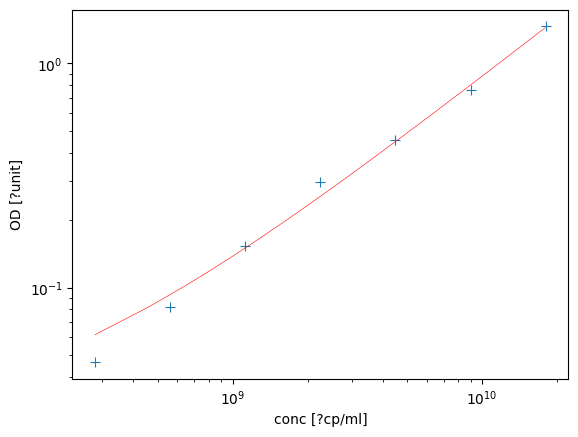

In [42]:
import fitdata
import matplotlib.pyplot as plt

fit_data_path = './data/fit_1.csv'

display(pd.read_csv(fit_data_path))

def fit_magic(x, y):
    c_init = (x.max() - x.min()) / 2.0
    popt, pcov, infodict, mesg, ier = fitdata.fit_reference(fitdata.func, 
                                                    x, y, c_init)
    
    print(popt)
    perr = np.sqrt(np.diag(pcov))
    print(perr)

    plt.scatter(x, y, marker='+', s=48, linewidths=0.8)
    plt.xscale('log')
    plt.yscale('log')

    num_pts = 100
    t = np.arange(x.min(), x.max(), (x.max() - x.min()) / num_pts)
    plt.plot(t, fitdata.func(t, *popt), 'r-',
             label='fit: a=%f, b=%f, c=%f, d=%f' % tuple(popt),
             linewidth=0.4)
    plt.xlabel('conc [?cp/ml]')
    plt.ylabel('OD [?unit]')
    plt.show()

df_fit = pd.read_csv(fit_data_path)
fit_magic(df_fit['Conc'], df_fit['OD'])

### Get the fitting data from dataframe

In [25]:
ref = df_all.loc[(df_all['plate_layout_ident']=='r')].copy()
ref['plate_layout_dil'] = ref['plate_layout_dil_id'].map(reference_conc['concentration'])
display(ref)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 5     3.158  3.2007  0.0427                  r                 1  \
  6    2.0378  2.0784  0.0406                  r                 1   
  7    1.1946  1.2342  0.0396                  r                 1   
  8    0.6939  0.7316  0.0377                  r                 1   
  9    0.3684  0.4052  0.0368                  r                 1   
  10   0.2027    0.24  0.0373                  r                 1   
  11   0.1096  0.1475  0.0379                  r                 1   

      plate_layout_dil_id  plate_layout_dil  
A 5                     1      2.090000e+10  
  6                     2      1.045000e+10  
  7                     3      5.225000e+09  
  8                     4      2.612500e+09  
  9                     5      1.306250e+09  
  10                    6      6.531250e+08  
  11                    7      3.265625e+08

### Fit with confidence interval

parameter [7.88772583e-03 9.41941933e-01 3.28000334e+10 7.97674872e+00]
error [1.88998764e-02 3.85490134e-02 5.89604313e+09 7.66816470e-01]
function calls 36
p0: 0.00789 [-0.0523, 0.068]
p1: 0.942 [0.819, 1.06]
p2: 3.28e+10 [1.4e+10, 5.16e+10]
p3: 7.98 [5.54, 10.4]


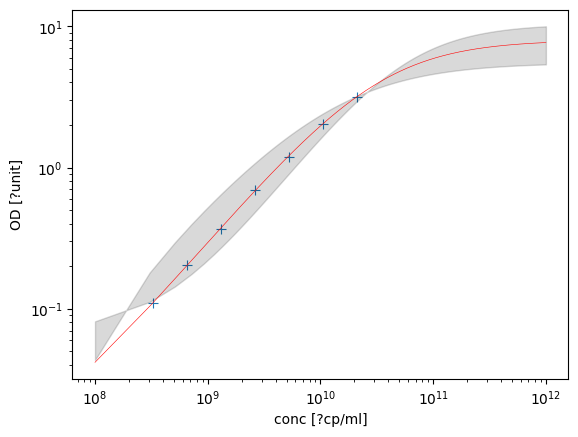

In [45]:
# from scipy.stats.distributions import  t
from scipy.stats import distributions

x = ref['plate_layout_dil']
y = ref['OD_delta']     

# x = df_fit['Conc']
# y = df_fit['OD']

c_init = (x.max() - x.min()) / 2.0
popt, pcov, infodict, mesg, ier = fitdata.fit_reference(fitdata.func, x, y, c_init)


def fit_image(x, y, popt, pcov, file_path):
    print('parameter', popt)
    perr = np.sqrt(np.diag(pcov))
    print('error', perr)
    print('function calls', infodict['nfev'])

    plt.scatter(x, y, marker='+', s=48, linewidths=0.8)
    plt.xscale('log')
    plt.yscale('log')

    CONFIDENCE_INTERVAL = 95.0 # 95% confidence interval = 100*(1-alpha)
    alpha = (100.0 - CONFIDENCE_INTERVAL) / 100.0 
    n = len(y)    # number of data points
    p = len(popt) # number of parameters
    dof = max(0, n - p) # number of degrees of freedom

    # student-t value for the dof and confidence level
    tval = distributions.t.ppf(1.0 - alpha / 2., dof) 

    sigma_popt = np.empty(len(popt), dtype=np.float64)
    for i, p, var in zip(range(n), popt, np.diag(pcov)):
        sigma = var ** 0.5
        st = sigma * tval
        sigma_popt[i] = st
        print('p{0}: {1:.3} [{2:.3}, {3:.3}]'.format(i, p, p - st, p + st))

    num_pts = 100
    # t = np.arange(x.min(), x.max(), (x.max() - x.min()) / num_pts)
    t = np.arange(1.0e8, 1.0e12, (x.max() - x.min()) / num_pts)
    plt.plot(t, fitdata.func(t, *popt), 'r-',
                label='fit: a=%f, b=%f, c=%f, d=%f' % tuple(popt),
                linewidth=0.4)
    plt.xlabel('conc [?cp/ml]')
    plt.ylabel('OD [?unit]')

    bound_upper = fitdata.func(t, *(popt + sigma_popt))
    bound_lower = fitdata.func(t, *(popt - sigma_popt))
    # plotting the confidence intervals
    plt.fill_between(t, bound_lower, bound_upper,
                    color = 'black', alpha = 0.15)
    plt.savefig(file_path)
    plt.show()

fit_image(x, y, popt, pcov, "./data/fit.png")

In [28]:
def fit_sheet(popt, pcov, confidence_interval=95.0):
    # `confidence_interval` 95% confidence interval = 100*(1-alpha)
    alpha = (100.0 - confidence_interval) / 100.0 
    n = len(y)    # number of data points
    p = len(popt) # number of parameters
    dof = max(0, n - p) # number of degrees of freedom

    # student-t value for the dof and confidence level
    tval = distributions.t.ppf(1.0 - alpha / 2.0, dof) 

    sigma_popt = np.empty(len(popt), dtype=np.float64)
    confidence_interval = [None] * 4
    for i, p, var in zip(range(n), popt, np.diag(pcov)):
        sigma = var ** 0.5
        st = sigma * tval
        sigma_popt[i] = st
        confidence_interval[i] = '[{0:.3}, {1:.3}]'.format(p - st, p + st)

    param_names = ['a', 'b', 'c', 'd']
    perr = np.sqrt(np.diag(pcov))

    return pd.DataFrame({'parameter name': param_names, 'estimated value':popt,
        'error': perr, 'confidence interval': confidence_interval})

display(fit_sheet(popt, pcov))

,parameter name,estimated value,error,confidence interval
0,a,7.887726e-03,1.889988e-02,"[-0.0523, 0.068]"
1,b,9.419419e-01,3.854901e-02,"[0.819, 1.06]"
2,c,3.280003e+10,5.896043e+09,"[1.4e+10, 5.16e+10]"
3,d,7.976749e+00,7.668165e-01,"[5.54, 10.4]"


## Sample evaluation

In [29]:
display(get_sample(df_all, 's', 1))

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
B 1    2.459  2.4998  0.0408                  s                 1  \
  2   1.4489  1.4888  0.0399                  s                 1   
  3   0.8489  0.8877  0.0388                  s                 1   
  4   0.4732  0.5114  0.0382                  s                 1   

     plate_layout_dil_id  
B 1                    1  
  2                    2  
  3                    3  
  4                    4

Fit the data, and apply the inverse function as a check...

In [30]:
popt, pcov, infodict, mesg, ier = fitdata.fit_reference_cinit(ref['plate_layout_dil'], ref['OD_delta'])  
od1 = fitdata.func(1.0e9, *popt)
inv_od1 = fitdata.inv_func(od1, *popt)
display(inv_od1)

1000000000.0000008

In [31]:
samplesk = df_all.loc[(df_all['plate_layout_ident']=='s') | (df_all['plate_layout_ident']=='k')]
samplesk.loc[:, ['plate_layout_dil']] = samplesk['plate_layout_dil_id'].map(reference_conc['dilution'])
display(samplesk)

def unique_sample_numbers(df):
  sample_nums = df['plate_layout_num'].astype(int).unique()
  sample_nums.sort()
  return sample_nums

sample_nums = unique_sample_numbers(samplesk)
display(sample_nums)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 1    3.0362  3.0779  0.0417                  k                 1  \
  2    1.9465  1.9868  0.0403                  k                 1   
  3    1.1445  1.1839  0.0394                  k                 1   
  4     0.631  0.6691  0.0381                  k                 1   
B 1     2.459  2.4998  0.0408                  s                 1   
...       ...     ...     ...                ...               ...   
H 8    0.0091  0.0462  0.0371                  s                14   
  9     0.008  0.0464  0.0384                  s                21   
  10   0.0081  0.0459  0.0378                  s                21   
  11   0.0094  0.0474   0.038                  s                21   
  12   0.0115  0.0483  0.0368                  s                21   

      plate_layout_dil_id  plate_layout_dil  
A 1                     1               1.0  
  2                     2               2.0  
  3                     3               4.0  
  4                     4               8.0  
B 1                     1               1.0  
...                   ...               ...  
H 8                     4               8.0  
  9                     1               1.0  
  10                    2               2.0  
  11                    3               4.0  
  12                    4               8.0  

[88 rows x 7 columns]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

For Coefficient of variation compution we need to use ddof (degrees of freedom) parameter set to `ddof=1`.

In [32]:
from scipy.stats import variation
import numpy

def conc_func(x, dil, *popt):
    return fitdata.inv_func(x, *popt) * dil

# process sample
sample_num = 1
a_sample = get_sample(samplesk, 'k', sample_num)
a_sample.loc[:, ['concentration']] = a_sample.apply(lambda x: conc_func(x['OD_delta'], x['plate_layout_dil'], *popt), axis=1)
display(a_sample)

test_cv = variation(a_sample['concentration'], ddof=1)
test_mean = numpy.mean(a_sample['concentration'])
print("CV %f" % test_cv)
print("mean %f" % test_mean)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 1   3.0362  3.0779  0.0417                  k                 1  \
  2   1.9465  1.9868  0.0403                  k                 1   
  3   1.1445  1.1839  0.0394                  k                 1   
  4    0.631  0.6691  0.0381                  k                 1   

     plate_layout_dil_id  plate_layout_dil  concentration  
A 1                    1               1.0   1.950731e+10  
  2                    2               2.0   1.966449e+10  
  3                    3               4.0   1.954209e+10  
  4                    4               8.0   1.911845e+10

CV 0.012141
mean 19458088064.557209


In [33]:
SAMPLE_TYPES = {'s':'sample', 'k':'controll', 'r':'refference'}

def process_sample(samples, stype, number):
    sample = get_sample(samples, stype, number)
    sample.loc[:, ['concentration']] = sample.apply(lambda x: conc_func(x['OD_delta'], x['plate_layout_dil'], *popt), axis=1)
    cv = variation(sample['concentration'], ddof=1)
    mean = numpy.mean(sample['concentration'])

    return sample, cv, mean


def print_sample(number, stype, sample, cv, mean):
    display(sample[['OD_delta', 'plate_layout_dil', 'concentration']])
    print("{1} '{2}' {0}".format(number, SAMPLE_TYPES[stype], stype))
    print("CV = {:2.3} [%]".format(100 * cv))
    print("mean = {:.4} [cp/ml]".format(mean))


process_sample(samplesk, 'k', 1)
for i in sample_nums:
    stype = 's'
    s = process_sample(samplesk, 's', i)
    print_sample(i, 's', *s)
    if i == 3: break;

OD_delta  plate_layout_dil  concentration
B 1    2.459               1.0   1.385973e+10
  2   1.4489               2.0   1.319356e+10
  3   0.8489               4.0   1.356969e+10
  4   0.4732               8.0   1.370928e+10

sample 's' 1
CV = 2.1 [%]
mean = 1.358e+10 [cp/ml]


OD_delta  plate_layout_dil  concentration
C 1    1.795               1.0   8.784057e+09
  2   0.9791               2.0   8.061288e+09
  3   0.5513               4.0   8.172350e+09
  4   0.3096               8.0   8.459048e+09

sample 's' 2
CV = 3.86 [%]
mean = 8.369e+09 [cp/ml]


OD_delta  plate_layout_dil  concentration
D 1   1.1006               1.0   4.653687e+09
  2   0.5858               2.0   4.383735e+09
  3   0.3201               4.0   4.392341e+09
  4   0.1726               8.0   4.366028e+09

sample 's' 3
CV = 3.08 [%]
mean = 4.449e+09 [cp/ml]


## Plate layout

In [35]:
df = plate_layout_num.replace({'b':-99}).astype(float)
df

,1,2,3,4,5,6,7,8,9,10,11,12
A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
B,1.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,15.0,15.0,15.0,15.0
C,2.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,16.0,16.0,16.0,16.0
D,3.0,3.0,3.0,3.0,10.0,10.0,10.0,10.0,17.0,17.0,17.0,17.0
E,4.0,4.0,4.0,4.0,11.0,11.0,11.0,11.0,18.0,18.0,18.0,18.0
F,5.0,5.0,5.0,5.0,12.0,12.0,12.0,12.0,19.0,19.0,19.0,19.0
G,6.0,6.0,6.0,6.0,13.0,13.0,13.0,13.0,20.0,20.0,20.0,20.0
H,7.0,7.0,7.0,7.0,14.0,14.0,14.0,14.0,21.0,21.0,21.0,21.0


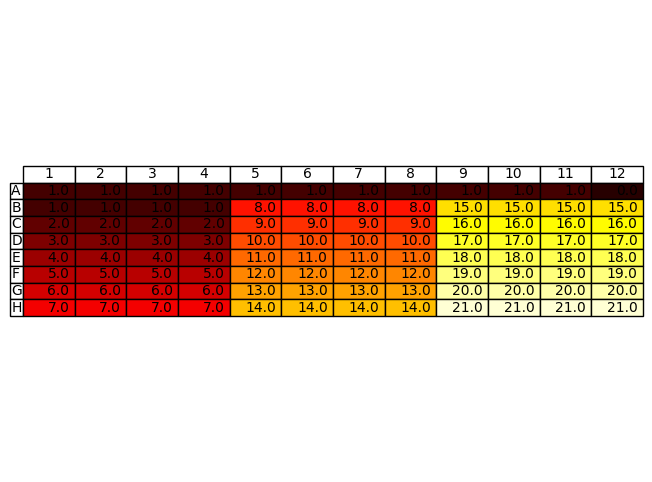

In [36]:
from matplotlib import pyplot as plt

vals = np.around(df.values, 2)
norm = plt.Normalize(vals.min()-1, vals.max()+1)
colours = plt.cm.hot(norm(vals))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns,
                    loc='center', cellColours=colours)
plt.show()

## Report

### Markdown report
We build a report here...

In [37]:
def sample_to_md(number, stype, sample, cv, mean):
    s_view = sample[['OD_delta', 'plate_layout_dil', 'concentration']]
    md = "### Sample: {0} '{1}' {2}\n\n".format(SAMPLE_TYPES[stype], stype, number)
    md += s_view.to_markdown()
    md += '\n\n'
    md += "CV = {:2.3} [%]  \n".format(100 * cv)
    md += "mean = {:.4} [cp/ml]\n\n".format(mean)

    return md

def sample_section_md(samples):
    section = '## Sample evaluation\n\n' 
    k = process_sample(samples, 'k', 1)
    section += sample_to_md(1, 'k', *k)
    for i in sample_nums:
        stype = 's'
        s = process_sample(samples, 's', i)
        section += sample_to_md(i, 's', *s)
    return section

def save_md(file_path, md_txt):
    try:
        with open(file_path, 'w') as fl:
            fl.write(md_txt)
    except Exception as e:
        print('Error: ' + str(e))

In [38]:
def fit_section_md(x, y):
    section = '## Refference Curve Fit\n\n'
    section += '$\LARGE x = {d + {a - d \over {1 + ({ x \over c })^b}} }$  \n\n'
    section += '!["alt text"](./data/fit.png)'
    df_fit = fit_sheet(popt, pcov)
    section += '\n\n' + df_fit.to_markdown(index=False) + '\n\n'

    return section

x = ref['plate_layout_dil']
y = ref['OD_delta']     

c_init = (x.max() - x.min()) / 2.0
popt, pcov, infodict, mesg, ier = fitdata.fit_reference(fitdata.func, x, y, c_init)

fit_section_md(x, y)

'## Refference Curve Fit\n\n$\\LARGE x = {d + {a - d \\over {1 + ({ x \\over c })^b}} }$  \n\n!["alt text"](./data/fit.png)\n\n| parameter name   |   estimated value |       error | confidence interval   |\n|:-----------------|------------------:|------------:|:----------------------|\n| a                |        0.00788773 | 0.0188999   | [-0.0523, 0.068]      |\n| b                |        0.941942   | 0.038549    | [0.819, 1.06]         |\n| c                |        3.28e+10   | 5.89604e+09 | [1.4e+10, 5.16e+10]   |\n| d                |        7.97675    | 0.766816    | [5.54, 10.4]          |\n\n'

In [39]:
report = '''
# Automatically Generated Markdown report

This a PoC for automatic report generation...  

'''

report += fit_section_md(x, y)
report += sample_section_md(samplesk)

save_md('./result/report.md', report)

### Export to PDF

In [ ]:
from md2pdf.core import md2pdf
PDF_FILE_PATH = "./result/my.pdf"

In [ ]:
md2pdf(PDF_FILE_PATH,
       md_content=report,
       md_file_path=None,
       css_file_path=None,
       base_url=None)